## Task 1: Importing Libraries

In [1]:
# %matplotlib inline

In [2]:
import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt
import PIL

print('Using Tensorflow', tf.__version__)
print('Using Numpy', np.__version__)
print('Using PIL', PIL.__version__)


Using Tensorflow 2.17.0
Using Numpy 1.26.4
Using PIL 10.4.0


In [3]:
# %pip uninstall tensorflow
# %pip install tensorflow

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## Task 2:Rotation

In [5]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

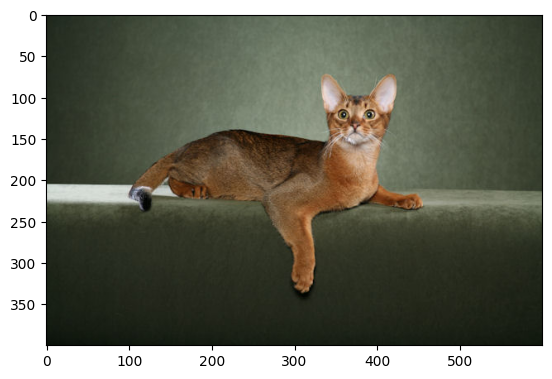

In [6]:
image_path = r"V:/Code/My Python Life/Python - College/Semester 5/Deep Learning/augmentation/images/cat/cat.jpg"

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


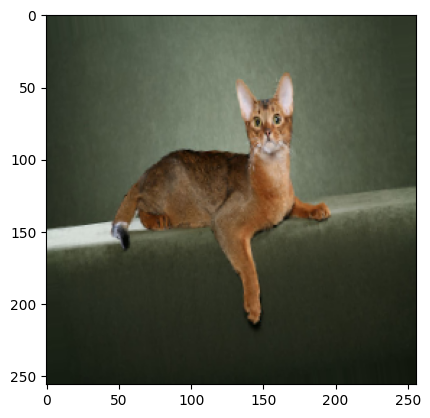

In [7]:
x, y = next(generator.flow_from_directory(r"V:/Code/My Python Life/Python - College/Semester 5/Deep Learning/augmentation/images/" , batch_size=1))

plt.imshow(x[0].astype('uint8'));

## Task 3:Width and Height Shifts

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range = [-50, 0, 50]
)

Found 1 images belonging to 1 classes.


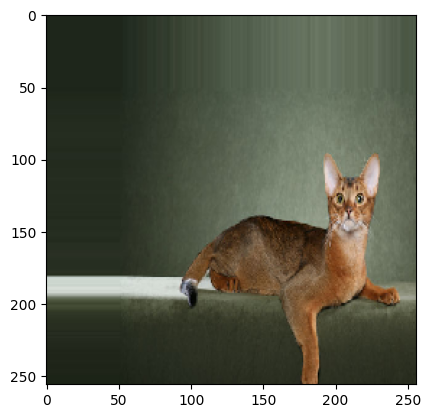

In [9]:
x, y = next(generator.flow_from_directory(r"V:/Code/My Python Life/Python - College/Semester 5/Deep Learning/augmentation/images/"  , batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 4:Brightness

Found 1 images belonging to 1 classes.


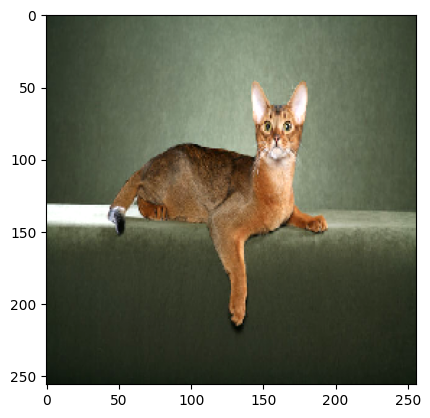

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.4, 2.5)
)

x, y = next(generator.flow_from_directory(r"V:/Code/My Python Life/Python - College/Semester 5/Deep Learning/augmentation/images/" , batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 5:Shear Transformation

Found 1 images belonging to 1 classes.


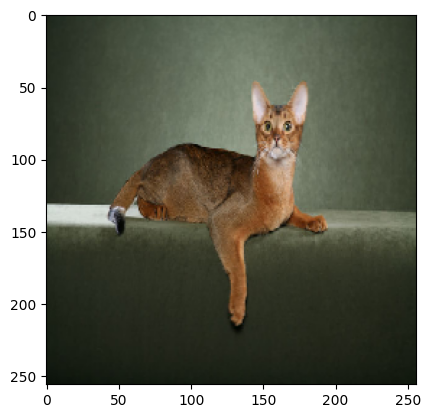

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)

x, y = next(generator.flow_from_directory(r"V:/Code/My Python Life/Python - College/Semester 5/Deep Learning/augmentation/images/" , batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 6:Zoom

Found 1 images belonging to 1 classes.


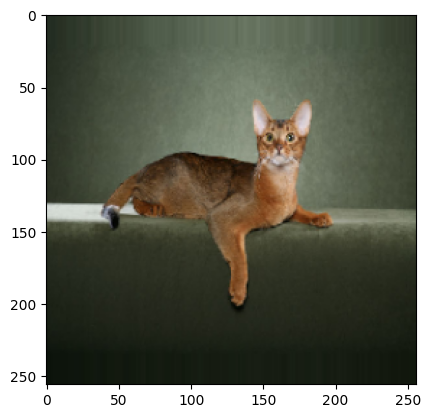

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = [0.5, 1.5]
)

x, y = next(generator.flow_from_directory(r"V:/Code/My Python Life/Python - College/Semester 5/Deep Learning/augmentation/images/" , batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 7:Channel Shift

Found 1 images belonging to 1 classes.


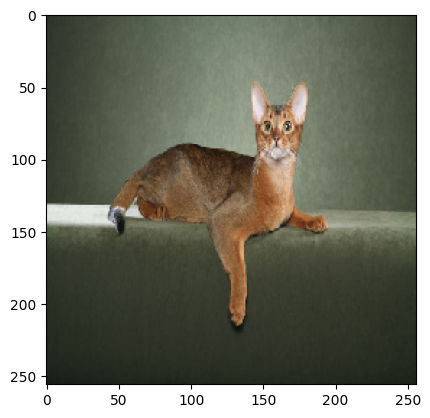

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory(r"V:/Code/My Python Life/Python - College/Semester 5/Deep Learning/augmentation/images/" , batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [14]:
x.mean()

81.67173

In [15]:
np.array(Image.open(image_path)).mean()

69.57810416666666

## Task 8:Flips

Found 1 images belonging to 1 classes.


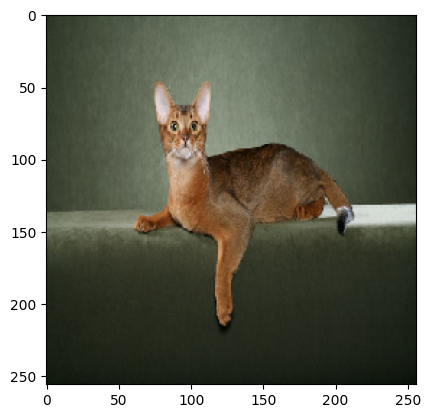

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory(r"V:/Code/My Python Life/Python - College/Semester 5/Deep Learning/augmentation/images/" , batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 9:Normalisation

### Featurewise

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 374s 2us/step


In [18]:
x, y = next(generator.flow(x_train, y_train, batch_size = 1))

print(x.mean(), x.std(),y)
print(x_train.mean())

-0.252134 0.61728114 [[2]]
120.70756512369792


### Samplewise

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator()

x, y = next(generator.flow(x_train, y_train, batch_size = 1))
print(x.mean(), x.std(),y)

108.20508 68.63415 [[8]]


## Task 10:Rescale and Processing Function

In [20]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
)

In [21]:
x, y = next(generator.flow(x_train, y_train, batch_size = 1))

In [22]:
print(x.mean(), x.std(),y)

0.012931496 0.42971215 [[3]]


## Task 11:Using in model training

In [23]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape = (32, 32, 3),
        pooling = 'avg'
    ),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

C:\Users\krish\AppData\Local\Temp\ipykernel_43968\1527685058.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  tf.keras.applications.mobilenet_v2.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 32s 3us/step


In [25]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs=5, steps_per_epoch=15
)

Epoch 1/5


c:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 152ms/step - accuracy: 0.1531 - loss: 3.2972
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.2344 - loss: 2.3679
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.2579 - loss: 2.1647
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.2751 - loss: 2.0285
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.2864 - loss: 2.0200
